In [3]:
import tensorflow as tf

# Is tf running on GPU

In [8]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS** using the GPU


# Constants

* constants are immutable!

In [9]:
x_const = tf.constant([[1., 2., 3.]])
x_const, x_const.shape, x_const.dtype

(<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>,
 TensorShape([1, 3]),
 tf.float32)

In [10]:
# operations
x_const_T = tf.transpose(x_const)
print(f'x_const = {x_const}')
print(f'x_const_T = {x_const_T}')
print(f'x_const + x_const = {x_const + x_const}')
print(f'x_const * x_const = {x_const * x_const}')
print(f'x_const @ x_const = {x_const @ x_const_T}')
print(f'concat x_const with itself, axis 0: {tf.concat([x_const, x_const], axis=0)}')
print(f'concat x_const with itself, axis 1: {tf.concat([x_const, x_const], axis=1)}')
print(f'apply softmax to x_const: {tf.nn.softmax(x_const, axis=-1)}') # -1 indicates the lst dim
print(f'sum x_const: {tf.reduce_sum(x_const)}')

x_const = [[1. 2. 3.]]
x_const_T = [[1.]
 [2.]
 [3.]]
x_const + x_const = [[2. 4. 6.]]
x_const * x_const = [[1. 4. 9.]]
x_const @ x_const = [[14.]]
concat x_const with itself, axis 0: [[1. 2. 3.]
 [1. 2. 3.]]
concat x_const with itself, axis 1: [[1. 2. 3. 1. 2. 3.]]
apply softmax to x_const: [[0.09003057 0.24472848 0.6652409 ]]
sum x_const: 6.0


# Variables

In [11]:
x_var = tf.Variable([[1., 2., 3.]])
x_var, x_var.shape, x_var.dtype

(<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[1., 2., 3.]], dtype=float32)>,
 TensorShape([1, 3]),
 tf.float32)

In [12]:
x_var.assign([[4., 5., 6.]])
x_var, x_var.shape, x_var.dtype

(<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[4., 5., 6.]], dtype=float32)>,
 TensorShape([1, 3]),
 tf.float32)

In [13]:
x_var.assign_add([[1., 1., 1.]])
x_var, x_var.shape, x_var.dtype

(<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[5., 6., 7.]], dtype=float32)>,
 TensorShape([1, 3]),
 tf.float32)

# Automatic Differenciation

In [17]:
def f(x):
    return x**2

x = tf.Variable(4.0)
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=16.0>

In [19]:
with tf.GradientTape() as tape:
    y = f(x)

g_x = tape.gradient(y, x)
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

# tf functions

While you can use TensorFlow interactively like any Python library, TensorFlow also provides tools for:

- Performance optimization: to speed up training and inference.
- Export: so you can save your model when it's done training.

In [23]:
@tf.function
def my_func(x):
  print('Tracing.\n')
  return tf.reduce_sum(x)

In [24]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [26]:
x = tf.constant([1, 2, 3])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=6>

In [27]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

# Module
A module is a class to manage Variables and the functions that can operate on them.


In [30]:
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self, x):
    return x * self.weight

In [32]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [35]:
# save a Module
save_path = './saved'
tf.saved_model.save(mod, save_path)

INFO:tensorflow:Assets written to: ./saved/assets


INFO:tensorflow:Assets written to: ./saved/assets


In [37]:
# reload a module
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

`tf.keras.layers.Layer` & `tf.keras.Model classes build on tf.Module`

# Basic Model

In [23]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [9, 6]

In [24]:
def plot_preds(x, y, f, title, model=None):
  plt.figure()
  plt.plot(x, y, '.', label='Data')
  plt.plot(x, f(x), label='Ground truth')
  if model:
      plt.plot(x, model(x), label='Predictions')
  plt.title(title)
  plt.legend()

In [25]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

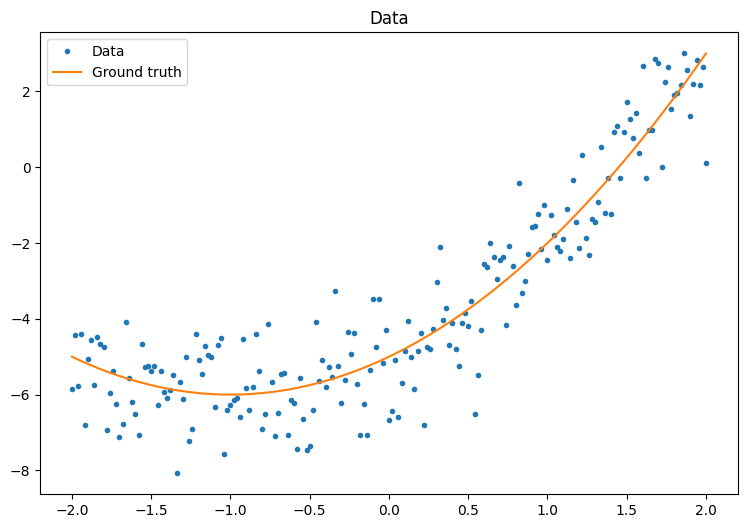

In [26]:
def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

plot_preds(x.numpy(), y.numpy(), f, 'Data')

In [27]:
# loss func
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

# model
class Model(tf.Module):
  def __init__(self):
    # Randomly generate weight and bias terms
    rand_init = tf.random.uniform(shape=[3], minval=0., maxval=5., seed=22)
    # Initialize model parameters
    self.w_q = tf.Variable(rand_init[0])
    self.w_l = tf.Variable(rand_init[1])
    self.b = tf.Variable(rand_init[2])
  
  @tf.function
  def __call__(self, x):
    # Quadratic Model : quadratic_weight * x^2 + linear_weight * x + bias
    return self.w_q * (x**2) + self.w_l * x + self.b

In [28]:
quad_model = Model()

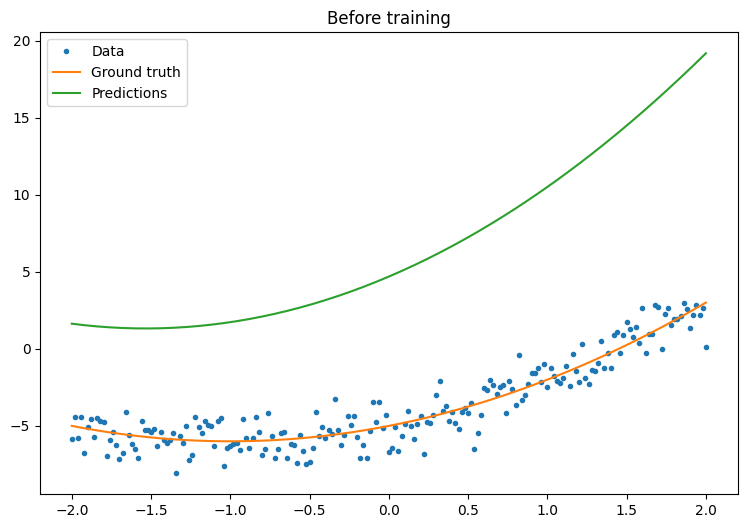

In [29]:
plot_preds(x, y, f, 'Before training', quad_model)

In [30]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Mean squared error for step 0: 57.020
Mean squared error for step 10: 9.810
Mean squared error for step 20: 4.040
Mean squared error for step 30: 2.057
Mean squared error for step 40: 1.333
Mean squared error for step 50: 1.090
Mean squared error for step 60: 1.003
Mean squared error for step 70: 0.971
Mean squared error for step 80: 0.958
Mean squared error for step 90: 0.957




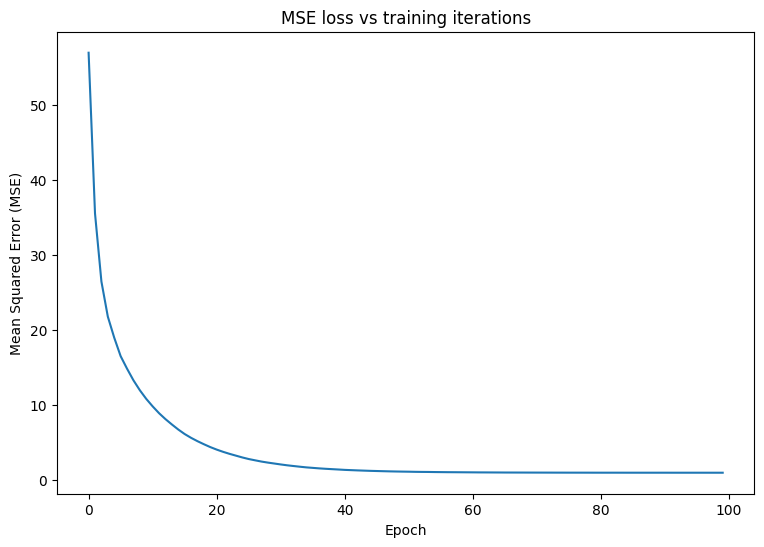

In [31]:
# training parameters
epochs = 100
learning_rate = 0.01
losses = []

# format training loop
for epoch in range(epochs):
  for x_batch, y_batch in dataset:
    with tf.GradientTape() as tape:
      batch_loss = mse_loss(quad_model(x_batch), y_batch)
    # update parameters with respect to the gradient calculations
    grads = tape.gradient(batch_loss, quad_model.variables)
    for g,v in zip(grads, quad_model.variables):
        v.assign_sub(learning_rate*g)
  # keep track of model loss per epoch
  loss = mse_loss(quad_model(x), y)
  losses.append(loss)
  if epoch % 10 == 0:
    print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# plot model results
print("\n")
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations');

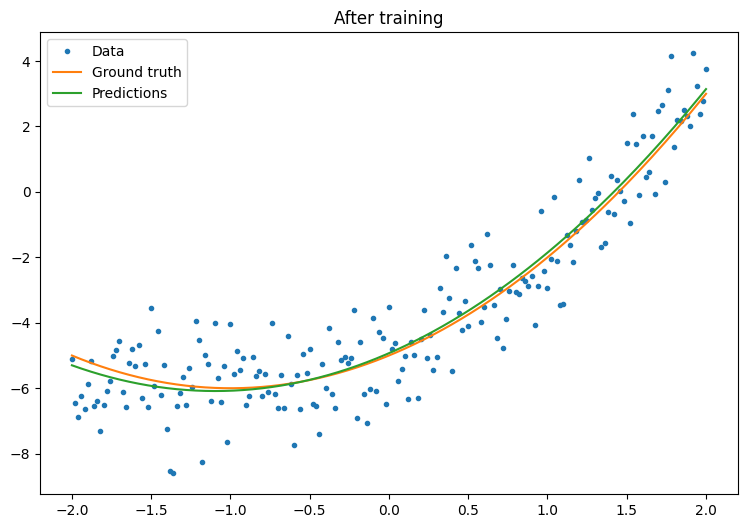

In [62]:
plot_preds(x, y, f, 'After training', model=quad_model)

# Model w/ Keras

In [32]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Lambda, Dense

In [37]:
model = Sequential()
model.add(Lambda(lambda x: tf.stack([x, x**2], axis=1)))
model.add(Dense(1, kernel_initializer=tf.random.normal))

In [38]:
model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01))

history = model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

model.save('./my_new_model')

INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(2, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1890e630d0>, 139743487460656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(2, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1890e630d0>, 139743487460656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1890e63430>, 139743487127632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1890e63430>, 139743487127632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(2, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1890e630d0>, 139743487460656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(2, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1890e630d0>, 139743487460656), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1890e63430>, 139743487127632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7f1890e63430>, 139743487127632), {}).


INFO:tensorflow:Assets written to: ./my_new_model/assets


INFO:tensorflow:Assets written to: ./my_new_model/assets
/opt/conda/lib/python3.10/site-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'function'>, which may lead to improper serialization.
  warnings.warn(


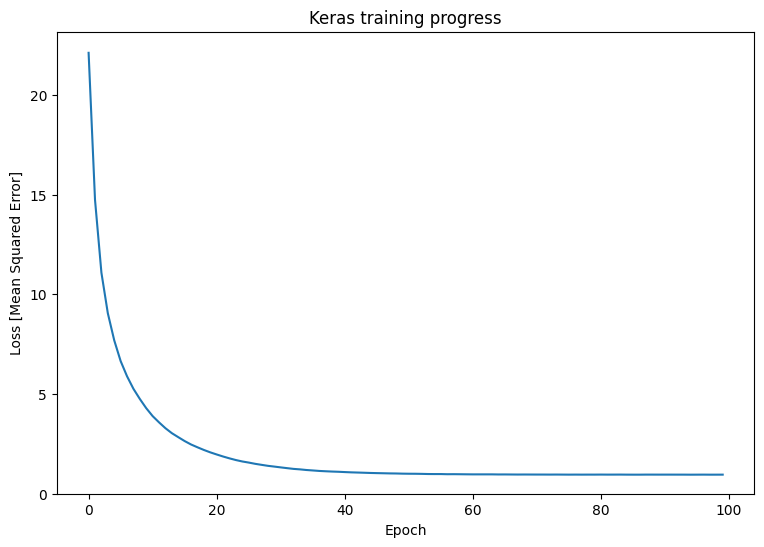

In [39]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');